# Représenter le niveau de bruit des établissements dans le referentiel structures

In [1]:
import pandas as pd
from wordcloud import WordCloud

## a. charger les donnés

In [2]:
df = pd.read_csv("../data/2022-06-aurehal-struct-noise-level-per-institution.csv")

In [3]:
print(f"nb d'étab. dans données {len(df)}")
df.info()

nb d'étab. dans données 146
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  146 non-null    int64  
 1   code                146 non-null    object 
 2   name                146 non-null    object 
 3   url                 146 non-null    object 
 4   structId            146 non-null    float64
 5   structId_name       76 non-null     object 
 6   nb_struct           146 non-null    int64  
 7   nb_struct_incoming  146 non-null    int64  
 8   noise               146 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 10.4+ KB


In [4]:
# ajouter une colonne clean pour valoriser les établissements ayant le moins de bruit
df["clean"] = 1 - df["noise"]

In [5]:
# ajouter une colonne noice_pct pour lecture du pourcentage
df["noise_pct"] = round(df["nb_struct_incoming"] * 100 / df["nb_struct"], 0)

In [6]:
# plus de lisibilité : réduire aux étabs avec plus de n structures
df = df[ df["nb_struct"] > 4].copy()

In [7]:
## creer un dictionnaire {etab : value}
etab_freq = df.set_index("code").to_dict()["clean"]

In [8]:
print(f"nb d'étab. dans données {len(df)}")

nb d'étab. dans données 135


## b. nuage de mots-clés

In [9]:
import matplotlib.pyplot as plt

In [10]:
wordcloud = WordCloud(background_color="white", width=800, height=400)
wordcloud.generate_from_frequencies(etab_freq)

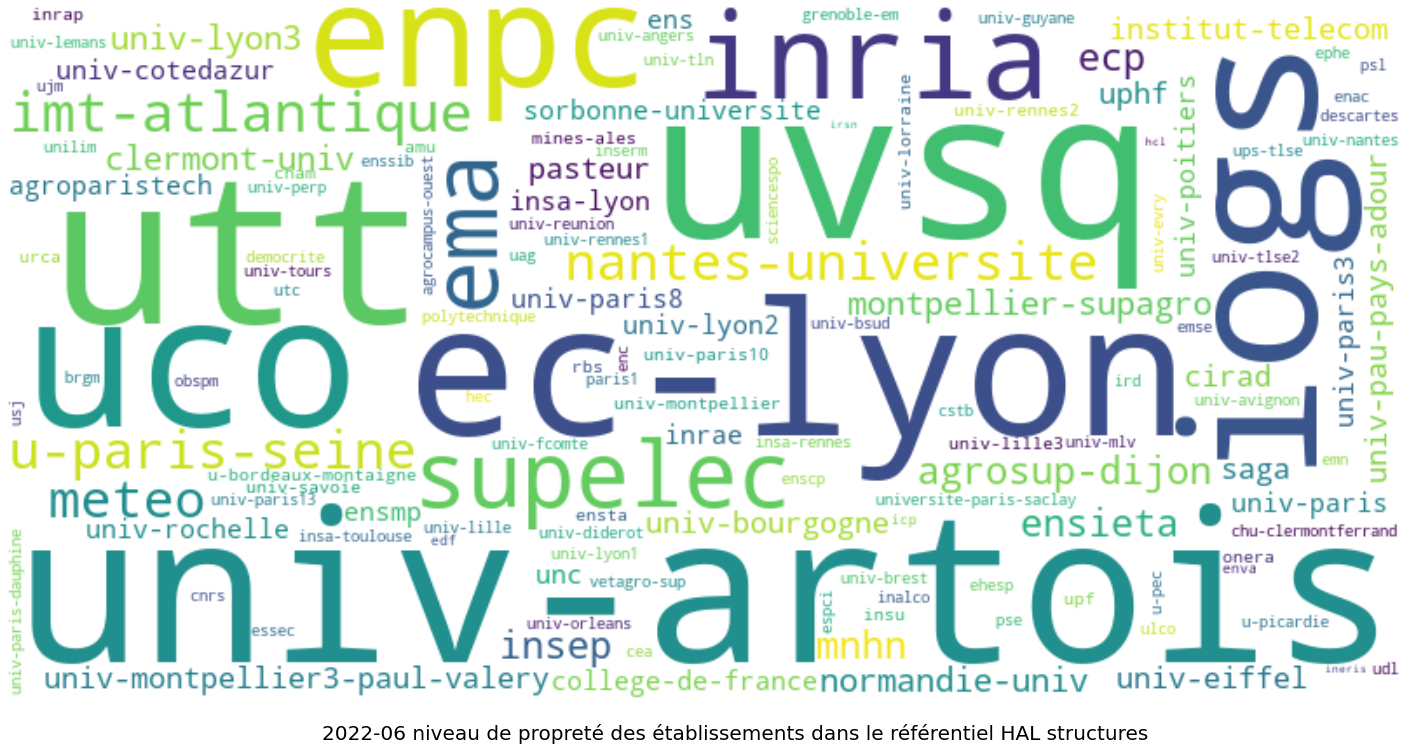

In [11]:
## memo bien préciser la date dans plt.texte

plt.figure(figsize=(25,18))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.text(180, 420, "2022-06 niveau de propreté des établissements dans le référentiel HAL structures",
         size = 20, color = "black")

plt.savefig("../img/noise-level-per-institution.png", bbox_inches='tight', pad_inches= 0)

In [12]:
## afficher les données en tableau

In [13]:
pd.set_option('display.max_rows', None) #pour afficher toutes les rows de la df
df.sort_values("noise", ascending = True , inplace = True)
df

,id,code,name,url,structId,structId_name,nb_struct,nb_struct_incoming,noise,clean,noise_pct
48,35,supelec,Supelec,https://hal-supelec.archives-ouvertes.fr,303397.0,Ecole Supérieure d'Electricité - SUPELEC (FRANCE),11,0,0.000000,1.000000,0.0
133,8393,univ-montpellier3-paul-valery,Université Paul Valéry Montpellier 3,https://hal-univ-montpellier3-paul-valery.arch...,42812.0,NaN,84,0,0.000000,1.000000,0.0
87,64,ensieta,ENSTA Bretagne,https://hal-ensta-bretagne.archives-ouvertes.fr,301846.0,NaN,18,0,0.000000,1.000000,0.0
28,66,iogs,Institut d'Optique Graduate School,https://hal-iogs.archives-ouvertes.fr,300036.0,Institut d'Optique Graduate School [IOGS],7,0,0.000000,1.000000,0.0
37,8897,uco,Université Catholique de l'Ouest,https://hal-uco.archives-ouvertes.fr,300844.0,Université Catholique de l'Ouest [UCO],22,0,0.000000,1.000000,0.0
109,4926,montpellier-supagro,Montpellier SupAgro,https://hal-montpellier-supagro.archives-ouver...,1090073.0,NaN,25,0,0.000000,1.000000,0.0
40,69,enpc,Ecole des Ponts ParisTech,https://hal-enpc.archives-ouvertes.fr,301545.0,École des Ponts ParisTech [ENPC],62,0,0.000000,1.000000,0.0
110,3895,normandie-univ,Normandie Université,https://hal-normandie-univ.archives-ouvertes.fr,455934.0,NaN,9,0,0.000000,1.000000,0.0
125,43,univ-lyon3,Université Jean Moulin Lyon 3,https://hal-univ-lyon3.archives-ouvertes.fr,118744.0,NaN,56,0,0.000000,1.000000,0.0
46,2,inria,Inria,https://hal.inria.fr,300009.0,Unknown Labs [Inria],93,0,0.000000,1.000000,0.0


In [14]:
df["noise_pct"].describe()

count    135.000000
mean      21.548148
std       22.800144
min        0.000000
25%        2.000000
50%       14.000000
75%       34.000000
max       89.000000
Name: noise_pct, dtype: float64